<a href="https://colab.research.google.com/github/Mongsel8/Data-Anaysis/blob/main/KMeans(feat_KMedian).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.9 MB 4.0 MB/s 
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=8cf6124d9213f876f3ec5e44e2a635da13f128a491e82adc596f3c3ba9a4a4bd
  Stored in directory: /root/.cache/pip/wheels/32/26/30/d71562a19eed948eaada9a61b4d722fa358657a3bfb5d151e2
Successfully built pydataset


In [ ]:
#K Means Clustering

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
iris = load_iris()
x = iris.data
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)
data = pd.DataFrame(x_s)
data

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


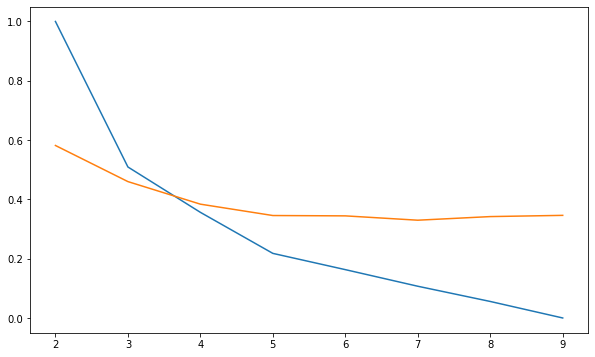

In [39]:
Sil = []
SSE = []
for k in range(2,10):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(data)
  SSE.append(kmeans.inertia_)
  Sil.append(silhouette_score(data,kmeans.labels_))
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax1 = fig.add_subplot(111)
ax.plot([i for i in range(2,10)],MinMaxScaler().fit_transform(np.array(SSE).reshape(-1,1)))
ax1.plot([i for i in range(2,10)],Sil)
plt.show()

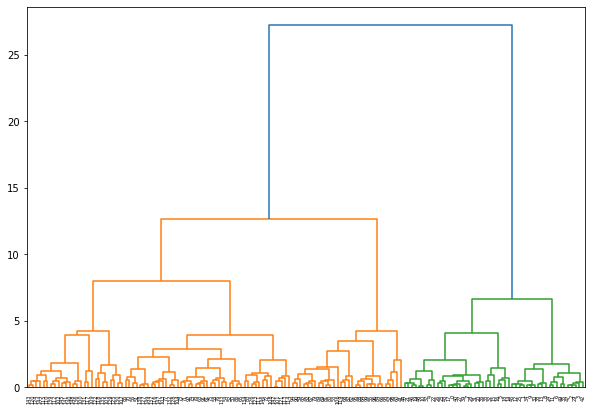

In [84]:

plt.figure(figsize=(10, 7))
dendrogram(linkage(x_s, method = 'ward'), 
           orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [40]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
'''
data['labels'] = kmeans.labels_
data['target'] = y
'''

"\ndata['labels'] = kmeans.labels_\ndata['target'] = y\n"

In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
data_pca=pca.fit_transform(data)
data_pca = pd.DataFrame(data_pca)


In [62]:
data_pca['label'] = kmeans.labels_

In [63]:
data_pca

,0,label
0,-2.264703,1
1,-2.080961,1
2,-2.364229,1
3,-2.299384,1
4,-2.389842,1
...,...,...
145,1.870503,0
146,1.564580,2
147,1.521170,0
148,1.372788,0


In [64]:
data_pca = data_pca.reset_index()
data_pca.columns

Index(['index', 0, 'label'], dtype='object')

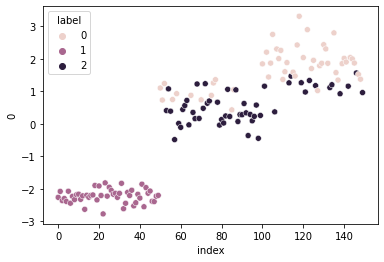

In [78]:
sns.scatterplot(x=data_pca['index'],y = data_pca[0],hue = data_pca['label'])

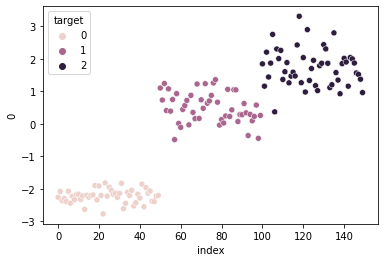

In [85]:
data_pca['target'] = y
sns.scatterplot(x=data_pca['index'],y = data_pca[0],hue = data_pca['target'])

In [98]:
data_pca['label2'] = np.where(data_pca.label ==1, 0, np.where(data_pca.label == 0, 2,1))

In [99]:
data_pca

,index,0,label,target,label2
0,0,-2.264703,1,0,0
1,1,-2.080961,1,0,0
2,2,-2.364229,1,0,0
3,3,-2.299384,1,0,0
4,4,-2.389842,1,0,0
...,...,...,...,...,...
145,145,1.870503,0,2,2
146,146,1.564580,2,2,1
147,147,1.521170,0,2,2
148,148,1.372788,0,2,2


In [100]:
from sklearn.metrics import accuracy_score
print(accuracy_score(data_pca.target, data_pca.label2))

0.8266666666666667


In [101]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.2 MB/s 


In [106]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(data)
data_km_pca = pca.fit_transform(data)
data_km_pca=pd.DataFrame(data_km_pca)

In [109]:
data_km_pca['target'] = y
data_km_pca['label'] = kmedoids.labels_
data_km_pca = data_km_pca.reset_index()

In [112]:
data_km_pca

,index,0,target,label
0,0,-2.264703,0,0
1,1,-2.080961,0,0
2,2,-2.364229,0,0
3,3,-2.299384,0,0
4,4,-2.389842,0,0
...,...,...,...,...
145,145,1.870503,2,2
146,146,1.564580,2,1
147,147,1.521170,2,2
148,148,1.372788,2,2


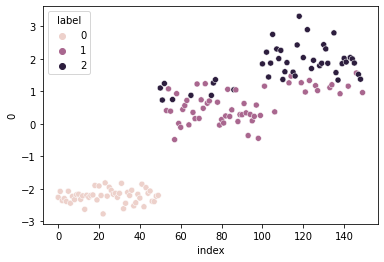

In [110]:
sns.scatterplot(x=data_km_pca['index'],y = data_km_pca[0],hue = data_km_pca['label'])

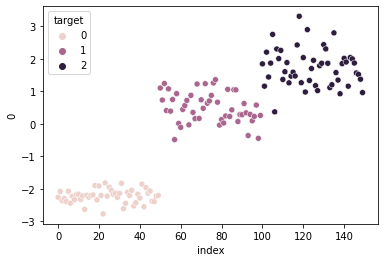

In [111]:
sns.scatterplot(x=data_km_pca['index'],y = data_km_pca[0],hue = data_km_pca['target'])

In [113]:
data_km_pca['label2'] = np.where(data_km_pca.label ==0, 0, np.where(data_km_pca.label == 2, 2,1))

In [115]:
print(accuracy_score(data_km_pca.target, data_km_pca.label2))

0.84
